In [1]:
# 02.10.2017
# Segerlind p.235

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)
%matplotlib inline

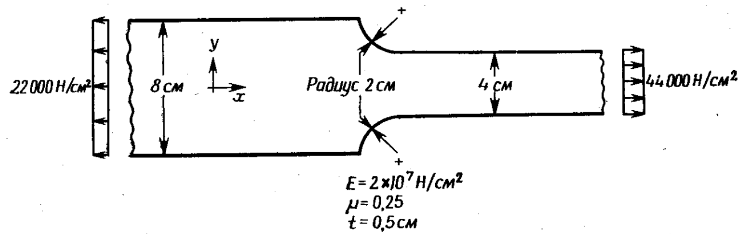

Требуется:
 - найти коэффициент концентрации напряжений
$$X_\sigma = \sigma_1/p$$, где
    $sigma_1$ - максимальное главное напряжение внутри детали,
    $p$ - приложенное осевое усилие

In [3]:
E = 2e7 # Н/см^2 (модуль упругости (Юнга))
mu = 0.25 # Коэффициент Пуассона
t = 0.5 # см (толщина элемента)
p = 44e3 # Н/см^2 (распределенное осевое усилие)

In [4]:
# Мы будем рассматривать только половину изделия
L = 15.0
L1 = 8.0
R = 2.0
L2 = 5.0
H = 4.0

In [5]:
a = 10.0
b = 4.0
def circle(phi):
    x = R * np.cos(phi) + a
    y = R * np.sin(phi) + b
    return (x, y)

In [6]:
N = 10
BN_bot = [[i, 0] for i in np.linspace(0, L, N * 3)]
BN_top1 = [[i, H] for i in np.linspace(0, L1, N * 2)]
BN_top2 = [[L1 + R + i, H/2] for i in np.linspace(0, L2, N)]
BN_left = [[0, i] for i in np.linspace(0, H, N)]
BN_right = [[L, i] for i in np.linspace(0, H/2, N)]
BN_circle = [[circle(i)[0], circle(i)[1]] for i in np.linspace(np.pi, np.pi + np.pi/2, N)]
# BN = BN_bot + BN_top1 + BN_circle + BN_top2 + BN_left + BN_right
# BN = BN_left + BN_top1 + BN_circle + BN_top2 + BN_right + BN_bot
BN = BN_bot + BN_right[1:] + list(reversed(BN_top2[:-1])) + list(reversed(BN_circle[:-1])) + list(reversed(BN_top1[:-1])) + list(reversed(BN_left[1:-1]))

(-0.75, 15.75, -0.20000000000000001, 4.2000000000000002)

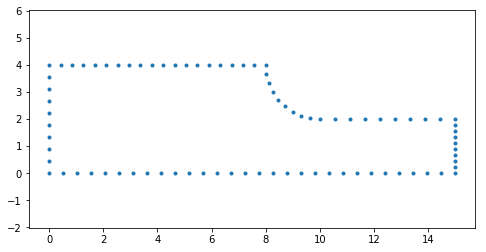

In [7]:
Xfig = [BN[i][0] for i in range(0, len(BN))]
Yfig = [BN[i][1] for i in range(0, len(BN))]
plt.gcf().set_size_inches((8,4))
plt.plot(Xfig, Yfig, '.')
plt.axis('equal')

In [8]:
def is_inside(x, y, delta):
    return not (x < 0.0 + delta or x > L - delta or y < 0.0 + delta or y > H - delta
            or (x > L1 + R and y > H/2 - delta)
            or ((x - a)**2 + (y - b)**2 < (R + delta)**2)
            )

In [9]:
delta = 0.2

(-0.75, 15.75, -0.20000000000000001, 4.2000000000000002)

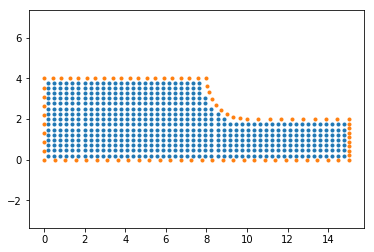

In [10]:
x = np.linspace(0+delta, L-delta, 50)
y = np.linspace(0+delta, H-delta, 15)
GRID = []
for i in x:
    for j in y:
        if(is_inside(i, j, delta)):
            GRID.append([i, j])
plt.plot([g[0] for g in GRID], [g[1] for g in GRID], '.')
plt.plot(Xfig, Yfig, '.')
plt.axis('equal')

In [11]:
XY = []
for i in x:
    for j in y:
        XY.append([i, j])
XY = np.array(XY)
Mask1 = np.linalg.norm(XY - np.array([L1+R, H]), axis=1) > R + delta
Mask2 = np.logical_not((XY[:,0] > L1 + R) & (XY[:,1] > H - R - delta))

In [12]:
XY1 = np.array(XY[Mask1 & Mask2])
XY1.shape

(569, 2)

In [13]:
XY2 = np.array([[Xfig[i], Yfig[i]] for i in range(0, len(Xfig))])
XY2.shape

(84, 2)

In [14]:
Nodes = np.vstack((XY2, XY1))
Nodes.shape

(653, 2)

In [15]:
import scipy.spatial as ss
tri = ss.Delaunay(Nodes)
tri

In [16]:
Elems = tri.simplices.copy()
Elems

array([[  1,  84,   0],
       [ 84,   1,  99],
       [ 84,  83,   0],
       ..., 
       [218, 217, 232],
       [202, 218, 203],
       [217, 218, 202]], dtype=int32)

(-1, 16)

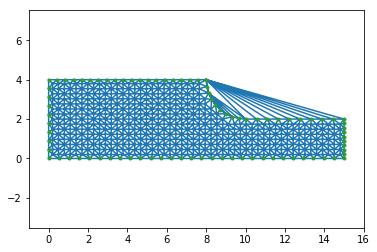

In [17]:
plt.triplot(Nodes[:,0], Nodes[:,1], Elems)
plt.plot(Xfig, Yfig, '.')
plt.axis('equal')
plt.xlim([-1, 16])

In [18]:
NElems = []
centers = [np.mean(Nodes[Elems[i]], axis=0) for i in range(0, len(Elems))]
for i in range(0, len(centers)):
    c = centers[i]
    if(is_inside(c[0], c[1], 0)):
        NElems.append(Elems[i])
NElems = np.array(NElems)
NElems.shape

(1220, 3)

In [19]:
# delta = 0.0
# centers = np.array([np.mean(Nodes[Elems[i]], axis=0) for i in range(0, len(Elems))])
# Mask21 = np.linalg.norm(centers - np.array([L1+R, H]), axis=1) > R + delta
# Mask22 = np.logical_not((centers[:,0] > L1 + R) & (centers[:,1] > H - R - delta))
# nelms = np.array(Elems[Mask21 & Mask22])
# print(nelms.shape)
# NElems = nelms

(-0.75, 15.75, -0.20000000000000001, 4.2000000000000002)

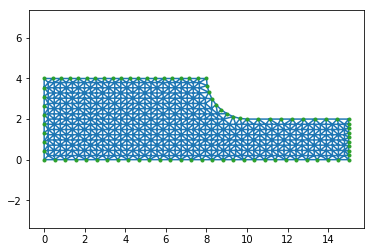

In [20]:
plt.triplot(Nodes[:,0], Nodes[:,1], NElems)
plt.plot(Xfig, Yfig, '.')
plt.axis('equal')

In [21]:
ElemC = Nodes[NElems]
ElemC

array([[[ 0.517,  0.   ],
        [ 0.2  ,  0.2  ],
        [ 0.   ,  0.   ]],

       [[ 0.2  ,  0.2  ],
        [ 0.517,  0.   ],
        [ 0.498,  0.2  ]],

       [[ 0.2  ,  0.2  ],
        [ 0.   ,  0.444],
        [ 0.   ,  0.   ]],

       ..., 
       [[ 2.584,  3.8  ],
        [ 2.584,  3.543],
        [ 2.882,  3.543]],

       [[ 2.286,  3.543],
        [ 2.584,  3.8  ],
        [ 2.286,  3.8  ]],

       [[ 2.584,  3.543],
        [ 2.584,  3.8  ],
        [ 2.286,  3.543]]])

In [22]:
# Ф-я для расчета площади элемента
# (работает для массивов a,b,c)
def elemarea(a, b, c):
    ab = b - a
    ac = c - a
    return 0.5 * (ab[:,0]*ac[:,1] - ab[:,1]*ac[:,0])

In [23]:
ElemA = elemarea(ElemC[:,0], ElemC[:,1], ElemC[:,2]).reshape(-1,1)
ElemA

array([[ 0.052],
       [ 0.03 ],
       [ 0.044],
       ..., 
       [ 0.038],
       [ 0.038],
       [ 0.038]])

In [24]:
np.sum(ElemA)

46.874332801995251

In [25]:
b = ElemC[:,[1,2,0],1] - ElemC[:,[2,0,1],1]
b

array([[ 0.2  ,  0.   , -0.2  ],
       [-0.2  ,  0.   ,  0.2  ],
       [ 0.444, -0.2  , -0.244],
       ..., 
       [ 0.   , -0.257,  0.257],
       [ 0.   ,  0.257, -0.257],
       [ 0.257,  0.   , -0.257]])

In [26]:
c = ElemC[:,[2, 0, 1],0] - ElemC[:,[1, 2, 0],0]
c

array([[-0.2  ,  0.517, -0.317],
       [-0.019, -0.298,  0.317],
       [ 0.   ,  0.2  , -0.2  ],
       ..., 
       [ 0.298, -0.298,  0.   ],
       [-0.298,  0.   ,  0.298],
       [-0.298,  0.298,  0.   ]])

In [27]:
coef = 1 / (2*ElemA)

In [28]:
Zeros = np.zeros_like(b[:,0])
B1 = np.stack(([b[:,0], Zeros, b[:,1], Zeros, b[:,2], Zeros]), axis=1) * coef[:,[0]*6]
B1.shape

(1220, 6)

In [29]:
B2 = np.stack(([Zeros, c[:,0], Zeros, c[:,1], Zeros, c[:,2]]), axis=1) * coef[:,[0]*6]
B2.shape

(1220, 6)

In [30]:
#B3 = np.stack(([c[:,0], b[:,0], c[:,1], b[:,1], c[:,2], b[:,2]]), axis=1)
B3 = np.roll(B1,1) + np.roll(B2,-1)
B3.shape

(1220, 6)

In [31]:
B = np.stack((B1, B2, B3), axis=1) # МАТРИЦА ГРАДИЕНТОВ
B.shape

(1220, 3, 6)

In [32]:
# матрица упругих постоянных
D = E / (1-mu**2)*np.array([[1,mu,0],[mu,1,0],[0,0,0.5*(1-mu)]])
D

array([[ 21333333.333,   5333333.333,         0.   ],
       [  5333333.333,  21333333.333,         0.   ],
       [        0.   ,         0.   ,   8000000.   ]])

In [33]:
coef = t * ElemA
# матрица жесткости элемента
BT = np.transpose(B, axes=(0, 2, 1))
Ke = np.matmul(np.matmul(BT, D), B)*coef[:, [[0]*6]*6]#t * ElemA.reshape(-1, 1, 1)
Ke.shape

(1220, 6, 6)

In [34]:
# Element Freedom Table
# i,j,k -> 2i,2i+1,2j,2j+1,2k,2k+1
EFT = 2*NElems[:, [0,0,1,1,2,2]] + np.array([0,1,0,1,0,1])
EFT.shape
EFT

array([[  2,   3, 168, 169,   0,   1],
       [168, 169,   2,   3, 198, 199],
       [168, 169, 166, 167,   0,   1],
       ..., 
       [436, 437, 434, 435, 464, 465],
       [404, 405, 436, 437, 406, 407],
       [434, 435, 436, 437, 404, 405]])

In [35]:
Nn = Nodes.shape[0]
Ne = NElems.shape[0]
Nn, Ne

(653, 1220)

In [36]:
# глобальная матрица жесткости
K = np.zeros((2*Nn, 2*Nn))
for e in range(Ne):
    EFTe = EFT[e].reshape(1,-1)
    K[EFTe.T, EFTe] += Ke[e]
K

array([[  8493154.534,   3877777.778,   -835555.556, ...,         0.   ,
                0.   ,         0.   ],
       [  3877777.778,   9706436.782,    -44444.444, ...,         0.   ,
                0.   ,         0.   ],
       [  -835555.556,    -44444.444,  11957278.848, ...,         0.   ,
                0.   ,         0.   ],
       ..., 
       [        0.   ,         0.   ,         0.   , ...,  28121464.945,
         -2427983.539,  -9819321.967],
       [        0.   ,         0.   ,         0.   , ...,  -2427983.539,
         29843775.306,   3072326.512],
       [        0.   ,         0.   ,         0.   , ...,  -9819321.967,
          3072326.512,  30167785.625]])

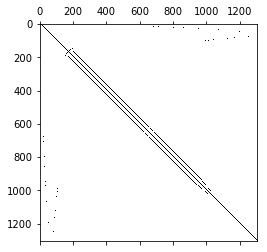

In [37]:
plt.spy(K)

(-0.75, 15.75, -0.20000000000000001, 4.2000000000000002)

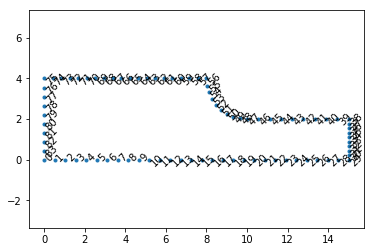

In [38]:
plt.plot(Xfig, Yfig, '.')
for ni,n in enumerate(BN):
    plt.text(n[0],n[1], '%d' % ni, fontsize=10, rotation=45)
plt.axis('equal')

In [39]:
# 16.10.2017

In [40]:
# Граничные узлы с нулевыми перемещениями по обеим
# степеням свободы
bc_fix = np.array(list(range(75, 84)) + [0]) # for N = 10
#bc_fix = np.array(list(range(35,39)) + [0]) # for N = 5
bc_fix

array([75, 76, 77, 78, 79, 80, 81, 82, 83,  0])

In [41]:
# Граничные узлы с нулевыми перемещениями по оси y
# (симметрия относительно оси x)
bc_sym = np.array(range(0, 30)) # for N = 10
#bc_sym = np.array(range(0, 15)) # for N = 5
bc_sym

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [42]:
# степени свободы с нулевыми перемещениями 
dof = np.hstack((bc_fix*2, bc_fix*2+1, bc_sym*2+1))
dof

array([150, 152, 154, 156, 158, 160, 162, 164, 166,   0, 151, 153, 155,
       157, 159, 161, 163, 165, 167,   1,   1,   3,   5,   7,   9,  11,
        13,  15,  17,  19,  21,  23,  25,  27,  29,  31,  33,  35,  37,
        39,  41,  43,  45,  47,  49,  51,  53,  55,  57,  59])

In [43]:
F = np.zeros(Nn*2)

In [44]:
# занулить строки с номерами dof[i]
# занулить столбцы с номерами dof[i]
# поставить 1 на диагональ в позициях (dof[i], dof[i])
# занулить элементы вектора F с номерами dof[i]

In [45]:
K[dof, :] = 0
K[:, dof] = 0
K[dof, dof] = 1
F[dof] = 0

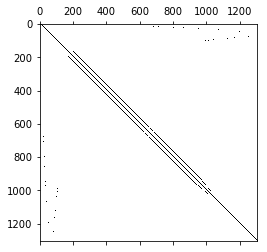

In [46]:
plt.spy(K)

In [47]:
# Пересчитать узловые усилия на границах.
# У нас есть распределенное усилие на боковых площадках,
# половина этого усилия идет на верхний узел,
# другая половия на нижний.

In [48]:
# Граничные условия на правую границу
bc_p = np.array(range(29, 39)) # for N = 10
#bc_p = np.array(range(14, 19)) # for N = 5
bc_p

array([29, 30, 31, 32, 33, 34, 35, 36, 37, 38])

In [49]:
# Кол-во узлов на правой границе
N4 = len(BN_right)
N4

10

In [50]:
# Длина куска ребра правой границы
L_p = (H - R) / (N4 - 1)
L_p

0.2222222222222222

In [51]:
F[bc_p[1:-1]*2] = p * L_p * t
F[bc_p[0]*2] = p * L_p * t / 2.0
F[bc_p[-1]*2] = p * L_p * t / 2.0

In [ ]:
for i, inn in enumerate(F):
    print(i, inn)

In [53]:
U = np.linalg.solve(K, F)
U

array([ 0.   ,  0.   ,  0.001, ..., -0.001,  0.024, -0.001])

In [54]:
np.max(np.abs(U))

0.024719476926766022

In [55]:
U.shape, Nodes.shape

((1306,), (653, 2))

In [56]:
scale = 100
resNodes = Nodes + scale * U.reshape(-1, 2)
resNodes

array([[  0.   ,   0.   ],
       [  0.568,   0.   ],
       [  1.139,   0.   ],
       ..., 
       [ 17.227,   1.16 ],
       [ 17.228,   1.403],
       [ 17.228,   1.646]])

In [57]:
XfigWas = [Nodes[i][0] for i in range(0, len(Nodes))]
YfigWas = [Nodes[i][1] for i in range(0, len(Nodes))]
XfigDef = [resNodes[i][0] for i in range(0, len(resNodes))]
YfigDef = [resNodes[i][1] for i in range(0, len(resNodes))]

(-2, 20)

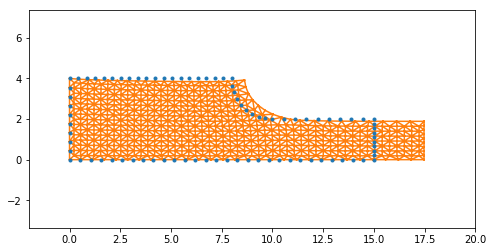

In [58]:
plt.gcf().set_size_inches((8,4))
plt.plot(Xfig, Yfig, '.')
plt.triplot(resNodes[:,0], resNodes[:,1], NElems)
plt.axis('equal')
plt.xlim([-2,20])

(-2, 20)

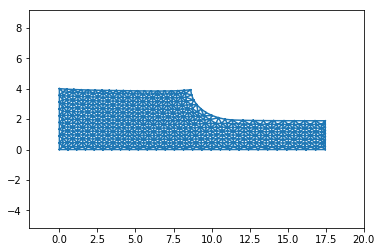

In [59]:
plt.triplot(resNodes[:, 0], resNodes[:, 1], NElems)
plt.axis('equal')
plt.xlim([-2, 20])

In [60]:
# Надо посчитать деформации
ElemU = U[EFT].reshape(-1, 6, 1)
ElemU.shape

(1220, 6, 1)

In [61]:
ElemEps = np.matmul(B, ElemU)
ElemEps.shape

(1220, 3, 1)

In [62]:
ElemSig = np.matmul(D, ElemEps)
ElemSig.shape

(1220, 3, 1)

In [65]:
NodeSig = np.zeros((Nn, 3)) # массив тензора напряжений
NodeA = np.zeros(Nn)
for i in range(Ne):
    NodeSig[NElems[i]] += ElemSig[i].T * ElemA[i]
    NodeA[NElems[i]] += ElemA[i]
NodeSig /= NodeA.reshape(-1, 1)

(-0.87359738463383096,
 18.34554507731043,
 -0.20000000000000012,
 4.2000000000000002)

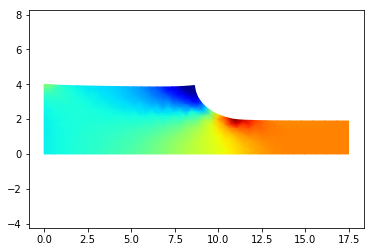

In [66]:
plt.tripcolor(resNodes[:,0], resNodes[:,1], NElems, NodeSig[:, 0],
             shading='gouraud', cmap='jet')
plt.axis('equal')

In [69]:
S1 = 0.5*(NodeSig[:,0] + NodeSig[:,1]) + np.sqrt((0.5*(NodeSig[:,0] - NodeSig[:,1]))**2 + NodeSig[:,2]**2)

(-0.87359738463383096,
 18.34554507731043,
 -0.20000000000000012,
 4.2000000000000002)

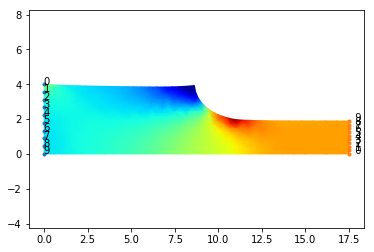

In [99]:
plt.tripcolor(resNodes[:,0], resNodes[:,1], NElems, S1,
             shading='gouraud', cmap='jet')
plt.plot(resNodes[bc_fix, 0], resNodes[bc_fix, 1], '.')
plt.plot(resNodes[bc_p, 0], resNodes[bc_p, 1], '.')
for ni,n in enumerate(resNodes[bc_fix]):
    plt.text(n[0],n[1], '%d' % ni, fontsize=10, text)
for ni,n in enumerate(resNodes[bc_p]):
    plt.text(n[0],n[1], '%d' % ni, fontsize=10)
plt.axis('equal')

# Задача оптимизации

In [71]:
def max_s1(H,L,W,R,t,P,alpha,E,mu):
    
    return maxS1

In [72]:
import scipy.optimize

In [ ]:
# из максимального вычитаем то, что хотим получить и возводим в квадрат
# эту функцию оптимизируем по параметру t
def goal(H,L,W,R,t,P,alpha,E,mu, St):
    return (max_s1(H,L,W,R,t,P,alpha,E,mu) - St)**2

In [ ]:
g = lambda t : goal(H,L,W,R,t,P,alpha,E,mu, St) # превратили в ф-ю от 1й переменной
scipy.optimize.fminbound(g, 0, 1000) # получаем оптимальную толщину t (в варианте может быть другая переменная)